# Assignment 02

Dear students,

The second worksheet is now available [here](https://mycampus.imp.fu-berlin.de/portal/directtool/c206efd7-b97b-481e-86e4-7210cd66f639/). You will have time until next Friday, 16:00 MEST.

Some torch classes that might come in handy:

* [torch.nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

* [torch.nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)

* [torch.nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html?highlight=softmax#torch.nn.Softmax) (for "one-hot encoding")

Best,
Your tutors

You are given MNIST-type training data of images with handwritten digits. The data consists of training images with associated labels in $\{0,1,\dots,9\}$ and an unlabeled test set.

Your task is to train a neural network model of your choice to predict the digit from the image.

As a submission, please upload the prediction of digits for the test set exactly as shown below.

For this prediction, we will use the following grading scheme:

| accuracy | points |
|----------|--------|
| ≥50%     | 5      |
| ≥75%     | 7      |
| ≥90%     | 10     |
 

If you present your work in the tutorial, be prepared to show your code, explain how you prepared the data, how you chose the network architecture and other hyperparameters, how you validated the model, and show the convergence of the training error.


To load and visualize the data, please refer to the following code:

(20000, 1, 28, 28) float32
(20000,) int64
(2000, 1, 28, 28) float32


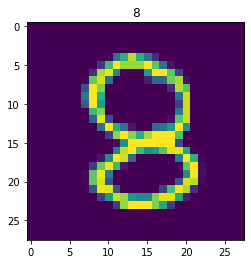

In [8]:
import io

import requests
import numpy as np
import matplotlib.pyplot as plt


response = requests.get('https://github.com/jneuendorf/deeplearning-lecture-21/blob/main/02/prediction-challenge-01-data.npz?raw=true')
with np.load(io.BytesIO(response.content)) as fh:
    data_x = fh['data_x']
    data_y = fh['data_y']
    test_x = fh['test_x']

# TRAINING DATA: INPUT (x) AND OUTPUT (y)
# 1. INDEX: IMAGE SERIAL NUMBER
# 2. INDEX: COLOR CHANNEL
# 3/4. INDEX: PIXEL VALUE
print(data_x.shape, data_x.dtype)
print(data_y.shape, data_y.dtype)

# TEST DATA: INPUT (x) ONLY
print(test_x.shape, test_x.dtype)

plt.imshow(data_x[0, 0])
plt.title(data_y[0])
plt.show()

---

# Training

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F


device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))


class Mnist(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.lin_relu = nn.Sequential(
            nn.Linear(data_x.shape[2] * data_x.shape[3], 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.lin_relu(x)


model = Mnist().to(device)
print(model)

X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")


loss_function = nn.MSELoss()
learning_rate = 1e-3
optim = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

n_samples = 100
n_iterations = 50_000

for it in range(n_iterations):
    optim.zero_grad()                            
    x = torch.rand(n_samples) * 2 - 1            
    y_pred = model(x)      
    y_true = f(x)                                
    loss = loss_function(y_true, y_pred)         
    loss.backward()                                                                          
    optim.step()                                 
    print(f"iteration {it}, mean-squared error is {loss.item():.4}", end="\r")

Using cuda device
Mnist(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lin_relu): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)
Predicted class: tensor([0], device='cuda:0')


IndexError: ignored

## Export

Use your trained model to predict the digits for the test data. Store the prediction as shown in the code snippet below and upload your prediction file.

Please note that you need to use exactly the shown file format, file name, and array shape as shown in the code snippet. Otherwise, we might not be able to correctly process your submission.

In [15]:
import numpy as np
import torch


prediction = torch.zeros(2000)  # THAT'S YOUR JOB
print(prediction.ndim)

# MAKE SURE THAT YOU HAVE THE RIGHT FORMAT
assert prediction.ndim == 1
assert prediction.shape[0] == 2000

# AND SAVE EXACTLY AS SHOWN BELOW
np.save('prediction.npy', prediction)

1
